In [36]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import RXGate, RZGate
import numpy as np

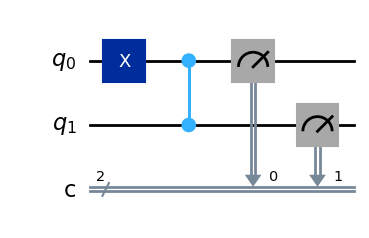

In [37]:
# Create a Quantum Circuit with 2 qubits
qc = QuantumCircuit(2, 2)

qc.x(0)
#qc.x(1)

# Apply a Controlled-Z (CZ) gate with qubit 0 as the control and qubit 1 as the target
qc.cz(0, 1)

qc.measure([0, 1], [0, 1])

# Draw the circuit
qc.draw('mpl')

{'01': 1024}


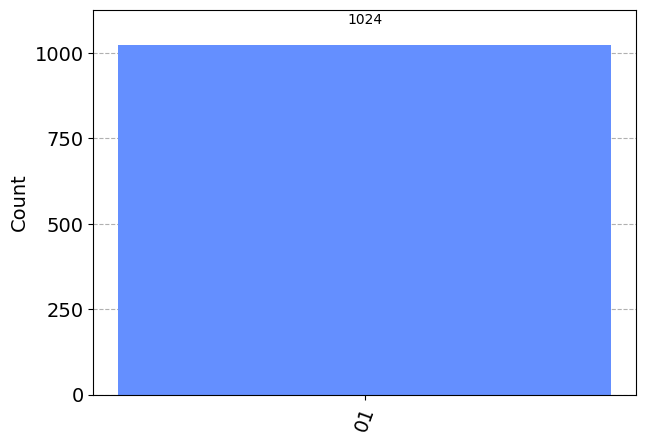

In [38]:
simulator = BasicSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit)
result = job.result()
print(result.get_counts())
plot_histogram(result.get_counts())

Operator([[ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j],
          [ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j],
          [ 0.+0.j,  0.+0.j, -1.+0.j,  0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


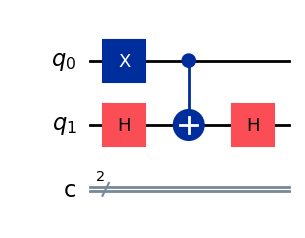

In [17]:
# Create a Quantum Circuit with 2 qubits
qc = QuantumCircuit(2, 2)

qc.x(0)
#qc.x(1)

# Apply Hadamard gate on the target qubit (qubit 1)
qc.h(1)

# Apply a CNOT gate with qubit 0 as control and qubit 1 as target
qc.cx(0, 1)

# Apply Hadamard gate on the target qubit again (qubit 1)
qc.h(1)

#qc.measure([0, 1], [0, 1])

print(Operator(qc)) # unitary

# Draw the circuit
qc.draw('mpl')

{'01': 1024}


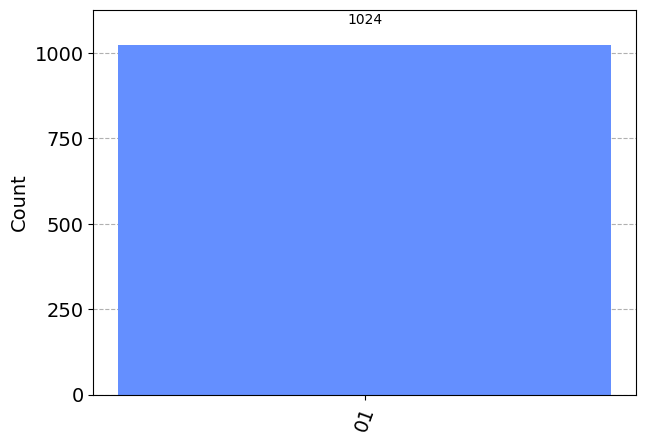

In [40]:
simulator = BasicSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit)
result = job.result()
print(result.get_counts())
plot_histogram(result.get_counts())

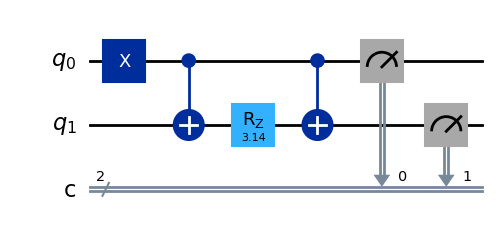

In [41]:
# Create a Quantum Circuit with 2 qubits
qc = QuantumCircuit(2, 2)

# Initialize both qubits to |1> state using X-gates
qc.x(0)
#qc.x(1)

# Apply the CZ decomposition with CNOT and RZ(pi)
qc.cx(0, 1)
qc.rz(3.14159, 1)  # Approximation of pi
qc.cx(0, 1)

# Measure the qubits
qc.measure([0, 1], [0, 1])

qc.draw('mpl')

{'01': 1024}


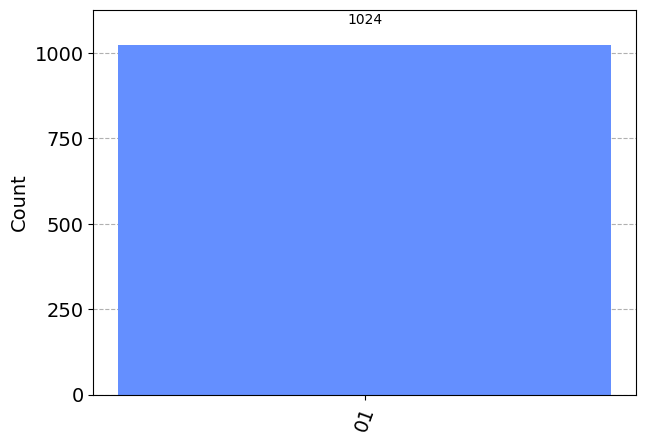

In [42]:
# Simulate the circuit
simulator = BasicSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit)
result = job.result()
print(result.get_counts())
plot_histogram(result.get_counts())

Operator([[ 0.5+0.j, -0.5+0.j, -0.5+0.j, -0.5+0.j],
          [-0.5+0.j,  0.5+0.j, -0.5+0.j, -0.5+0.j],
          [-0.5+0.j, -0.5+0.j,  0.5+0.j, -0.5+0.j],
          [-0.5+0.j, -0.5+0.j, -0.5+0.j,  0.5+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


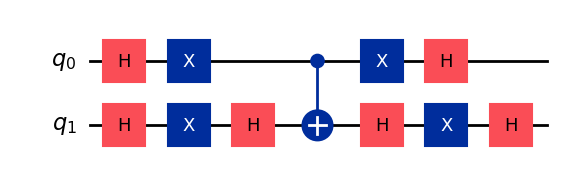

In [55]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator, Statevector, DensityMatrix

# Create a quantum circuit with 2 qubits
qc = QuantumCircuit(2)

# Step 1: Apply Hadamard gates to both qubits to create superposition
qc.h(0)
qc.h(1)

# Step 2: Apply X gates to both qubits
qc.x(0)
qc.x(1)

#qc.cz(0, 1)
# Step 3: Apply a controlled-NOT (CNOT) gate with qubit 0 as control and qubit 1 as target
qc.h(1)      # Hadamard on qubit 1 (target) to convert CNOT to a CZ effect
qc.cx(0, 1)  # CNOT gate
qc.h(1)      # Hadamard on qubit 1 (target) to undo CZ effect

# Step 4: Apply X gates to both qubits again to revert the X inversion
qc.x(0)
qc.x(1)

# Step 5: Apply Hadamard gates to both qubits again to return to the computational basis
qc.h(0)
qc.h(1)


print(Operator(qc)) # unitary

# Draw the circuit
qc.draw('mpl')

In [43]:
import numpy as np

H = [[1, 1], [1, -1]]
X = [[0, 1], [1, 0]]
I = [[1, 0], [0, 1]]

H_ = np.kron(H, H)
H_


array([[ 1,  1,  1,  1],
       [ 1, -1,  1, -1],
       [ 1,  1, -1, -1],
       [ 1, -1, -1,  1]])

In [39]:
X_ = np.kron(X, X)
X_

array([[0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0]])

In [41]:
np.dot(X_, H_)

array([[ 1, -1, -1,  1],
       [ 1,  1, -1, -1],
       [ 1, -1,  1, -1],
       [ 1,  1,  1,  1]])

In [47]:
np.kron(I, H)

array([[ 1,  1,  0,  0],
       [ 1, -1,  0,  0],
       [ 0,  0,  1,  1],
       [ 0,  0,  1, -1]])

Operator([[ 0.5+0.j, -0.5+0.j, -0.5+0.j, -0.5+0.j],
          [-0.5+0.j,  0.5+0.j, -0.5+0.j, -0.5+0.j],
          [-0.5+0.j, -0.5+0.j,  0.5+0.j, -0.5+0.j],
          [-0.5+0.j, -0.5+0.j, -0.5+0.j,  0.5+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


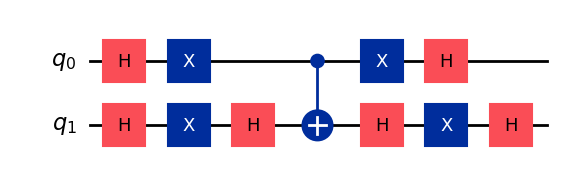

In [57]:
from qiskit import QuantumCircuit

# Number of qubits
n = 2

# Create quantum circuit with n qubits
qc = QuantumCircuit(n)

# Step 1: Apply Hadamard gates to all qubits
qc.h(range(n))

# Step 2: Apply X gates to all qubits
qc.x(range(n))

# Step 3: Apply controlled-Z gate (multi-controlled)
qc.h(n-1)          # Convert the target qubit's phase with Hadamard
qc.mcx(list(range(n-1)), n-1)  # Apply multi-controlled X gate (CNOT with n-1 controls)
qc.h(n-1)          # Convert back with Hadamard

# Step 4: Apply X gates again to all qubits
qc.x(range(n))

# Step 5: Apply Hadamard gates again to all qubits
qc.h(range(n))

print(Operator(qc))

# Draw the circuit
qc.draw('mpl')
